#INTRODUCTION

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).

DATASET COLUMNS FEATURE EXPLAIN

*   Age (age in years)
*   Sex (1 = male; 0 = female)
*CP (chest pain type)
*TRESTBPS (resting blood pressure (in mm Hg on admission to the hospital))
*CHOL (serum cholestoral in mg/dl)
FPS (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
*RESTECH (resting electrocardiographic results)
*THALACH (maximum heart rate achieved)
EXANG (exercise induced angina (1 = yes; 0 = no))
*OLDPEAK (ST depression induced by exercise relative to rest)
*SLOPE (the slope of the peak exercise ST segment)
*CA (number of major vessels (0-3) colored by flourosopy)
*THAL (3 = normal; 6 = fixed defect; 7 = reversable defect)
*TARGET (1 or 0)






In [0]:
import numpy as np
import pandas as pd

In [0]:
data=pd.read_csv('heart.csv')

In [168]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [169]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Describe function is a function that allows analysis between the numerical values contained in the data set. Using this function count, mean, std, min, max, 25%, 50%, 75%.

As seen in this section, most values are generally categorized. This means that we need to integrate other values into this situation. These; age, trestbps, chol, thalach.

In [170]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [171]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [0]:
data=data.rename(columns={'age':'Age','sex':'Sex','cp':'Cp','trestbps':'Trestbps','chol':'Chol','fbs':'Fbs','restecg':'Restecg','thalach':'Thalach','exang':'Exang','oldpeak':'Oldpeak','slope':'Slope','ca':'Ca','thal':'Thal','target':'Target'})

In [173]:
data.columns

Index(['Age', 'Sex', 'Cp', 'Trestbps', 'Chol', 'Fbs', 'Restecg', 'Thalach',
       'Exang', 'Oldpeak', 'Slope', 'Ca', 'Thal', 'Target'],
      dtype='object')

In [174]:
#And, how many rows and columns are there for all data?
data.shape 
#first one is rows, other is columns

(303, 14)

#Data Cleaning

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

In [176]:
#Now,I will check null on all data and If data has null, I will sum of null data's. In this way, how many missing data is in the data.
print('Data Sum of Null Values \n')
data.isnull().sum()

Data Sum of Null Values 



Age         0
Sex         0
Cp          0
Trestbps    0
Chol        0
Fbs         0
Restecg     0
Thalach     0
Exang       0
Oldpeak     0
Slope       0
Ca          0
Thal        0
Target      0
dtype: int64

In [177]:
#all rows control for null values
data.isnull().values.any()

False

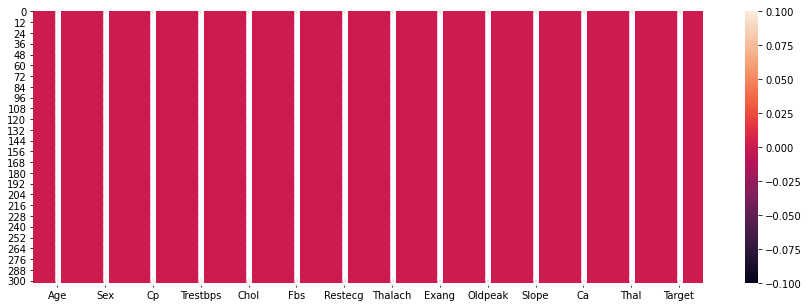

In [178]:
fig,ax=plt.subplots(figsize=(15,5))
sns.heatmap(data.isnull(), annot=True)

THAT'S Good. No Missing Values

##Correlation

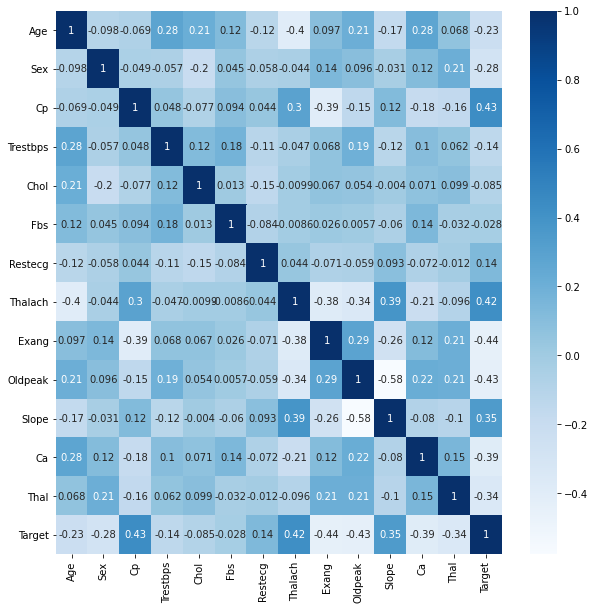

In [179]:
#plt.figure(figsize=(10,10))
#sns.heatmap(data.corr(),annot=True,fmt='.1f')
#plt.show()
fig=plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot= True, cmap='Blues')

##Feature Analysis

How many people are suffering from Heart Disease ?

Text(0.5, 1.0, 'Heart Disease')

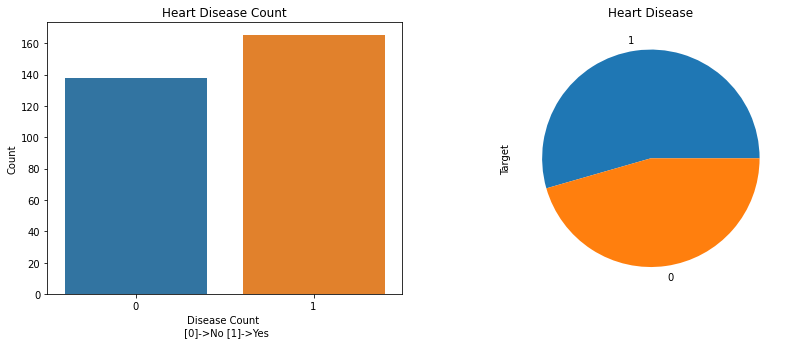

In [180]:
fig,ax=plt.subplots(1, 2, figsize = (14,5))
sns.countplot(data=data, x='Target', ax=ax[0])
ax[0].set_xlabel("Disease Count \n [0]->No [1]->Yes")
ax[0].set_ylabel("Count")
ax[0].set_title("Heart Disease Count")
data['Target'].value_counts().plot.pie()
plt.title("Heart Disease")

From above graph we can say that more than half of the population suffering from Heart Disease with parcentage of 54.5%.

###Based on SEX

Text(0.5, 1.0, '0 ->Female , 1 -> Male')

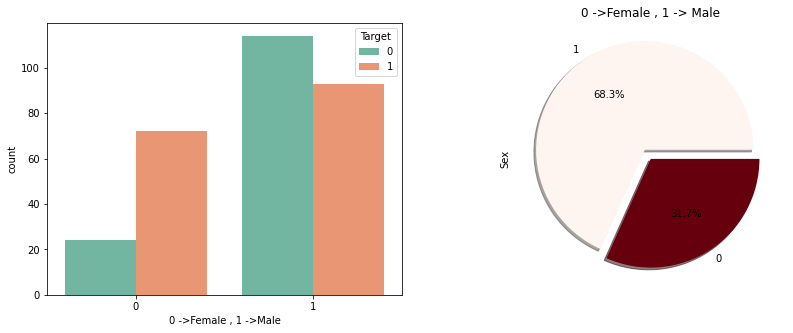

In [181]:
fig,ax=plt.subplots(1,2,figsize=(14,5))
sns.countplot(x='Sex',data=data,hue='Target',palette='Set2',ax=ax[0])
ax[0].set_xlabel("0 ->Female , 1 ->Male")
data.Sex.value_counts().plot.pie(ax=ax[1],autopct='%1.1f%%',shadow=True, explode=[0.1,0], cmap='Reds')
ax[1].set_title("0 ->Female , 1 -> Male")

Number of Women suffering from Heart Disease are more than Men but Men population is more than Women. We will use these insight for our model developement.

###Based on Fasting Blood Sugar (FBS)

Text(0.5, 1.0, '0 -> fbs <120 , 1 -> fbs>120')

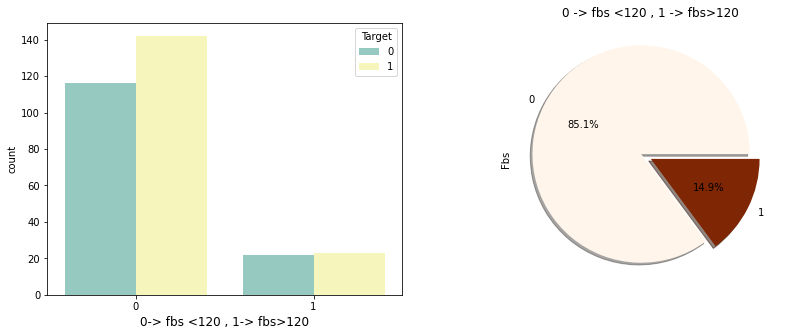

In [182]:
fig,ax=plt.subplots(1,2,figsize=(14,5))
sns.countplot(x='Fbs',data=data,hue='Target',palette='Set3',ax=ax[0])
ax[0].set_xlabel("0-> fbs <120 , 1-> fbs>120",size=12)
data.Fbs.value_counts().plot.pie(ax=ax[1],autopct='%1.1f%%',shadow=True, explode=[0.1,0],cmap='Oranges')
ax[1].set_title("0 -> fbs <120 , 1 -> fbs>120",size=12)

People having fps < 120 have more chance of having Heart Disease than people havnig fps >120

##Based on Rest ECG

Text(0.5, 1.0, 'Resting Electrocardiographic')

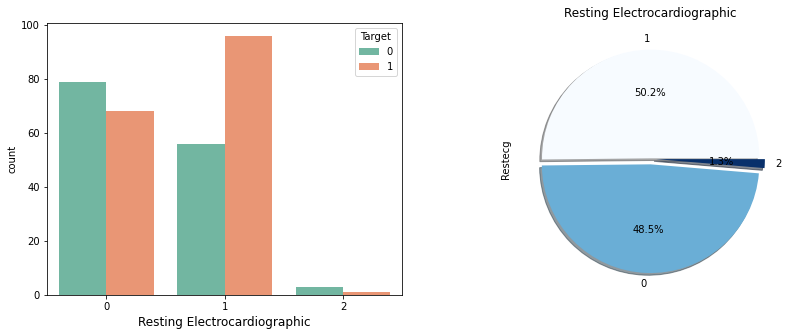

In [183]:
fig,ax=plt.subplots(1,2,figsize=(14,5))
sns.countplot(x='Restecg',data=data,hue='Target',palette='Set2',ax=ax[0])
ax[0].set_xlabel("Resting Electrocardiographic",size=12)
data.Restecg.value_counts().plot.pie(ax=ax[1],autopct='%1.1f%%',shadow=True,
                                     explode=[0.005,0.05,0.05],cmap='Blues')
ax[1].set_title("Resting Electrocardiographic",size=12)

 if resting electrocardiographic is 1 then person have more chances of suffering from Heart Disease

#Based on peak excersise ST segment

Text(0.5, 1.0, 'peak exercise ST segment ')

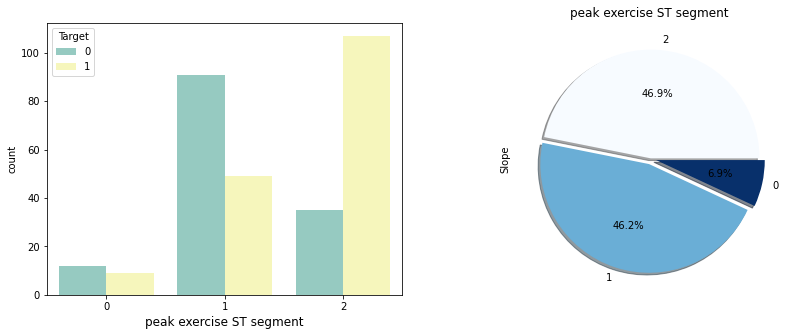

In [184]:
fig,ax=plt.subplots(1,2,figsize=(14,5))
sns.countplot(x='Slope',data=data,hue='Target',palette='Set3',ax=ax[0])
ax[0].set_xlabel("peak exercise ST segment",size=12)
data.Slope.value_counts().plot.pie(ax=ax[1],autopct='%1.1f%%',shadow=True,explode=[0.005,0.05,0.05],cmap='Blues')

ax[1].set_title("peak exercise ST segment ",size=12)

Feature (the peak exercise ST segment slope) has three symbolic values (flat, up sloping, downsloping)

Therefore People having up sloping are more prone to Heart Disease than flat and downsloping. This is useful for our model

##Analyzing heart disease over age distribution¶

Text(0, 0.5, 'Heart Disease Frequency')

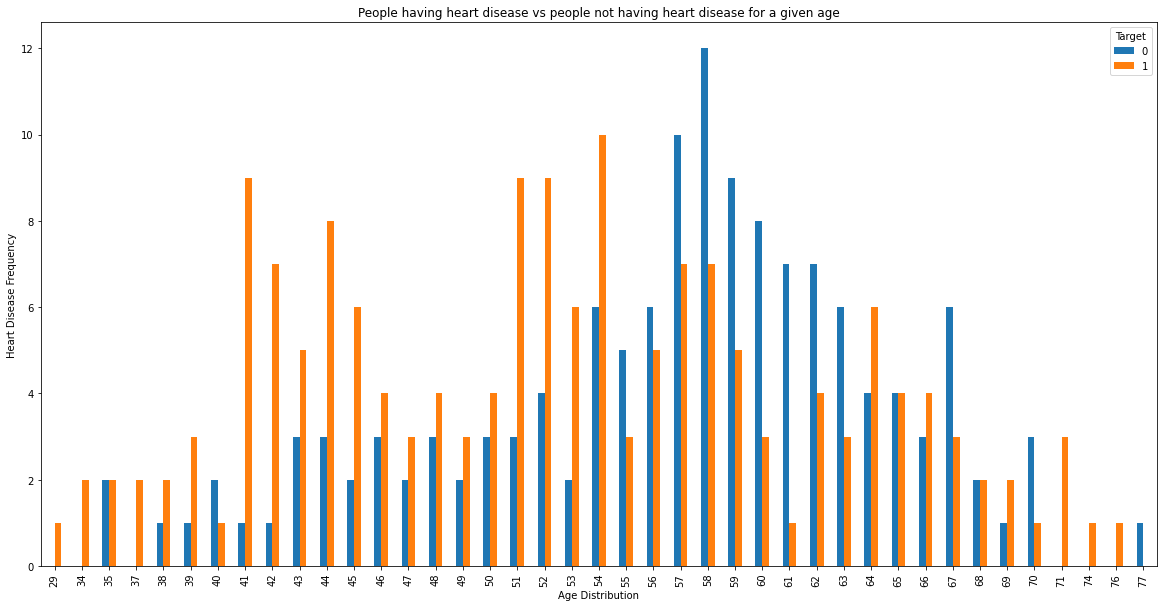

In [185]:
pd.crosstab(data.Age, data.Target).plot(kind='bar', figsize=(20, 10))
plt.title("People having heart disease vs people not having heart disease for a given age")
plt.xlabel("Age Distribution")
plt.ylabel("Heart Disease Frequency")

We could infer from the chart above that age is not a huge influening factor for heart disease



##Analyzing heart disease over Maximum Heart Rate¶


Text(0, 0.5, 'Heart Disease Frequency')

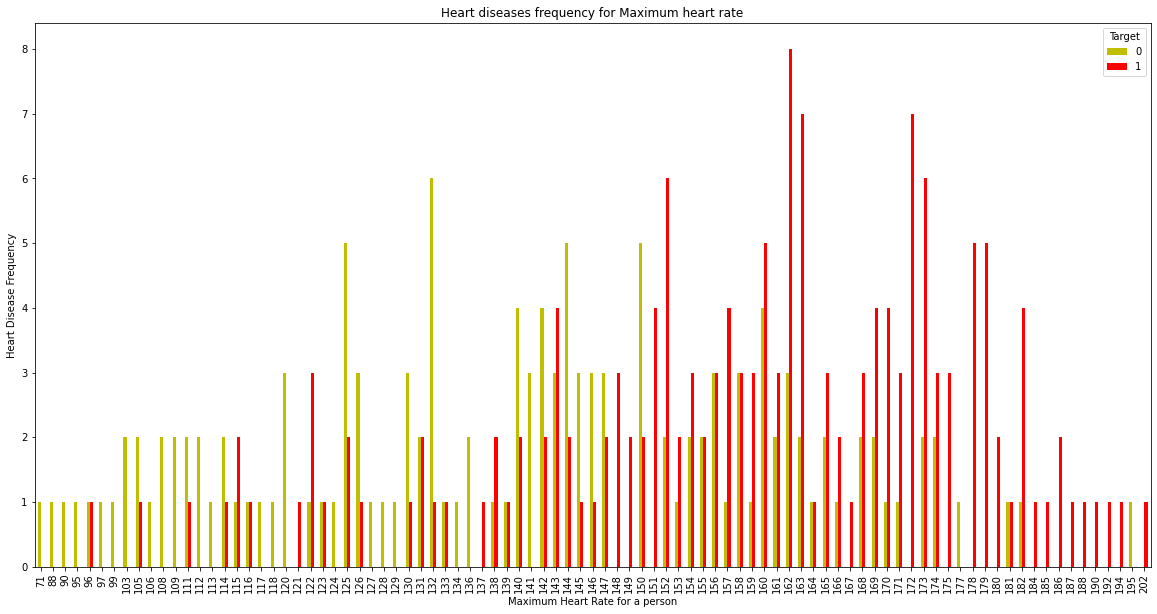

In [186]:
my_colors = 'yr'
pd.crosstab(data.Thalach, data.Target).plot(kind='bar', figsize=(20,10), color=my_colors)
plt.title("Heart diseases frequency for Maximum heart rate")
plt.xlabel("Maximum Heart Rate for a person")
plt.ylabel("Heart Disease Frequency")

We could infer from the above chart that people who have higher heart rate has a higher probability of having a heart disease

##Analyzing heart disease frequency over chest pain type

Chest pain type:

1 --> Typical angina

2 --> Atypical angina

3 --> Non-anginal pain

4 --> Asymptomatic

Text(0, 0.5, 'Heart Disease Frequency')

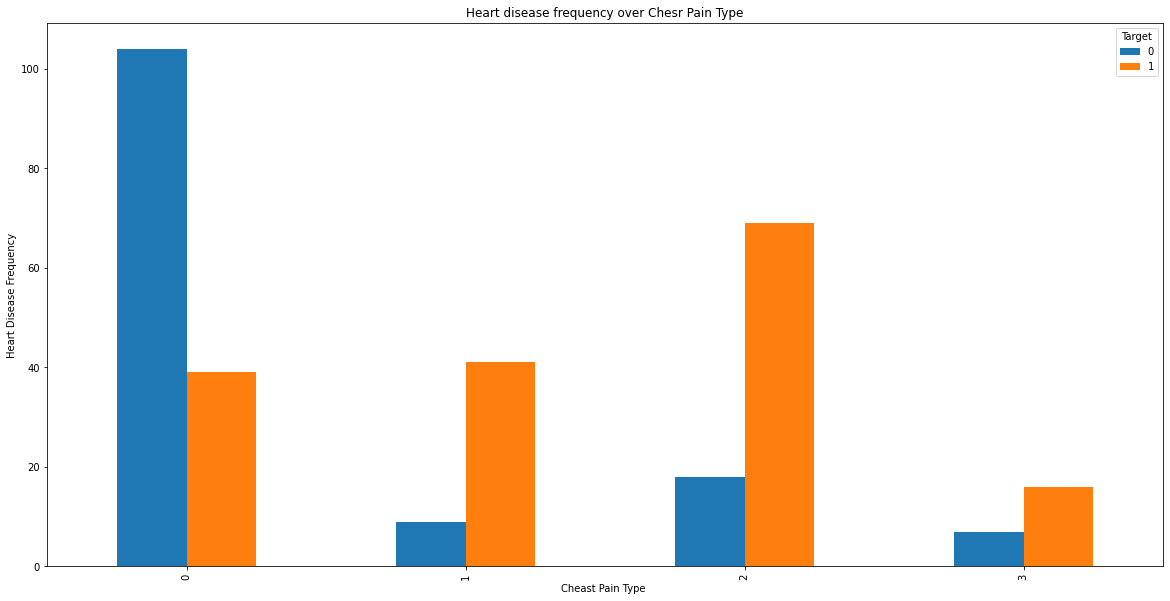

In [187]:
pd.crosstab(data.Cp, data.Target).plot(kind='bar', figsize = (20,10))
plt.title("Heart disease frequency over Chesr Pain Type")
plt.xlabel("Cheast Pain Type ")
plt.ylabel("Heart Disease Frequency")

We could infer from the above chrat that people who have Atypical angina or non-anginal pain have higher probability of having heart disease

#NEURAL NETWORKS

In [0]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [189]:
a = pd.get_dummies(data['Cp'], prefix = "Cp")
b = pd.get_dummies(data['Thal'], prefix = "Thal")
c = pd.get_dummies(data['Slope'], prefix = "Slope")
frames = [data, a, b, c]
data = pd.concat(frames, axis = 1)

to_be_dropped = ['Cp', 'Thal', 'Slope']
data = data.drop(to_be_dropped, axis=1)
data.head()

,Age,Sex,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Ca,Target,Cp_0,Cp_1,Cp_2,Cp_3,Thal_0,Thal_1,Thal_2,Thal_3,Slope_0,Slope_1,Slope_2
0,63,1,145,233,1,0,150,0,2.3,0,1,0,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,1,0,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,1,0,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,1,0,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,1,1,0,0,0,0,0,1,0,0,0,1


In [0]:
data = (data - np.min(data)) / (np.max(data) - np.min(data)).values
attributes = data.drop(columns='Target')
targets = data['Target']


from sklearn.model_selection import train_test_split
trainAttr, testAttr, trainTarget, testTarget = train_test_split(attributes, targets, test_size = 0.2, random_state = 42)


In [0]:
from tensorflow.python.keras import models
from tensorflow.python.keras import layers

model = models.Sequential()
model.add(layers.Dense(16,activation='relu', input_shape=(trainAttr.shape[1],)))
model.add(layers.Dense(16,activation='relu'))
#model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [192]:
history = model.fit(trainAttr, trainTarget, epochs=8, batch_size=16)

Epoch 1/8
16/16 [==============================] - 0s 2ms/step - loss: 0.6600 - accuracy: 0.6777
Epoch 2/8
16/16 [==============================] - 0s 1ms/step - loss: 0.6148 - accuracy: 0.7562
Epoch 3/8
16/16 [==============================] - 0s 1ms/step - loss: 0.5789 - accuracy: 0.7810
Epoch 4/8
16/16 [==============================] - 0s 1ms/step - loss: 0.5459 - accuracy: 0.7975
Epoch 5/8
16/16 [==============================] - 0s 1ms/step - loss: 0.5168 - accuracy: 0.8140
Epoch 6/8
16/16 [==============================] - 0s 1ms/step - loss: 0.4905 - accuracy: 0.8140
Epoch 7/8
16/16 [==============================] - 0s 1ms/step - loss: 0.4672 - accuracy: 0.8099
Epoch 8/8
16/16 [==============================] - 0s 1ms/step - loss: 0.4498 - accuracy: 0.8099


In [193]:
results = model.evaluate(testAttr, testTarget)
results

2/2 [==============================] - 0s 3ms/step - loss: 0.4261 - accuracy: 0.8361


[0.4260517954826355, 0.8360655903816223]

#Linear Regression

In [0]:
from sklearn import model_selection
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from scipy.stats import zscore


In [0]:
x = np.array(data.drop(['Target', 'Fbs', 'Restecg'], 1))
y = np.array(data['Target'])


In [0]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, stratify=y, random_state=42, test_size = 0.2)


In [0]:
poly_model = make_pipeline(linear_model.LinearRegression(fit_intercept=False))


In [198]:
poly_model.fit(x_train, y_train)
predict = poly_model.predict(x_test)
print(predict)
print(y_test)

[ 0.08222322  0.17792874 -0.15340228  0.73968135  0.5109697   0.12278746
  0.88470528  0.44698867  1.09090252  0.53968113  0.26425431  0.57518931
  0.14339633  0.97412251  1.07329789  0.87104077  0.98425437  0.64656432
  0.79218952  0.67882737  0.81568431  0.28271171  0.92342495  0.87102693
  0.94013649  0.06134925  0.29207646  0.50349892  0.37733979  0.68630175
  0.19060099  0.79611592  0.48369576  0.15113374 -0.09843129  0.54560904
  0.60441141  0.90364172  0.99602679  0.28998783  0.37099982  0.85136988
  1.05563492  0.58091013  0.27983522  0.40774235  0.87047406  0.54611828
  0.62226635  0.89137193  0.61339875  0.92467438  0.52235237 -0.09060851
  0.87948458  1.10858632  1.0375012   0.57012239 -0.03778529  0.16411585
  0.8627955 ]
[0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0.
 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0.
 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1.]


In [199]:
error = (abs(predict - y_test)).sum() / len(y_test)
error

0.2951751974447477

#KNN

In [200]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

data_label=data['Target']
del data['Target']
data_label=pd.DataFrame(data_label)
data_label

,Target
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
298,0.0
299,0.0
300,0.0
301,0.0


In [201]:
data_scaled=MinMaxScaler().fit_transform(data)
data_scaled=pd.DataFrame(data=data_scaled, columns=data.columns)
data_scaled

,Age,Sex,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Ca,Cp_0,Cp_1,Cp_2,Cp_3,Thal_0,Thal_1,Thal_2,Thal_3,Slope_0,Slope_1,Slope_2
0,0.708333,1.0,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.00,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.166667,1.0,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.00,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.250000,0.0,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,0.00,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.562500,1.0,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,0.00,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.583333,0.0,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,0.00,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.583333,0.0,0.433962,0.262557,0.0,0.5,0.396947,1.0,0.032258,0.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
299,0.333333,1.0,0.150943,0.315068,0.0,0.5,0.465649,0.0,0.193548,0.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
300,0.812500,1.0,0.471698,0.152968,1.0,0.5,0.534351,0.0,0.548387,0.50,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
301,0.583333,1.0,0.339623,0.011416,0.0,0.5,0.335878,1.0,0.193548,0.25,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [0]:
def CrossVal(dataX,dataY,mode,cv=3):
    score=cross_val_score(mode,dataX , dataY, cv=cv, scoring='accuracy')
    return(np.mean(score))

In [0]:
def plotting(true,pred):
    fig,ax=plt.subplots(figsize=(10,5))
    precision,recall,threshold = precision_recall_curve(true,pred[:,1])
    ax.plot(recall,precision,'g--')
    ax.set_xlabel('Recall')
    ax.set_ylabel('Precision')
    ax.set_title("Average Precision Score : {}".format(average_precision_score(true,pred[:,1])))

In [204]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

Xtrain,Xtest,Ytrain,Ytest = train_test_split(data_scaled, data_label, test_size=0.20, random_state=217)

for i in range(1, 20):
  k=KNeighborsClassifier(algorithm='auto',n_neighbors= i)
  score_k=CrossVal(Xtrain, Ytrain.values.ravel(), k)
  print('{} : {}'.format(i, score_k))

1 : 0.7604423868312757
2 : 0.7605452674897119
3 : 0.7727880658436215
4 : 0.7893004115226336
5 : 0.7933641975308642
6 : 0.8140946502057614
7 : 0.8140432098765432
8 : 0.8140946502057614
9 : 0.8264917695473252
10 : 0.818261316872428
11 : 0.8223251028806584
12 : 0.8265432098765432
13 : 0.8141460905349794
14 : 0.8265432098765432
15 : 0.8347222222222221
16 : 0.8347736625514403
17 : 0.8512345679012346
18 : 0.8430041152263374
19 : 0.8471707818930042


In [205]:
k=KNeighborsClassifier(algorithm='auto',n_neighbors= 17)
score_k=CrossVal(Xtrain,Ytrain.values.ravel(),k)
k.fit(Xtrain,Ytrain)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=17, p=2,
                     weights='uniform')

Accuracy is :  0.8512345679012346


Text(0.5, 1.0, 'F1 Score = 0.78125')

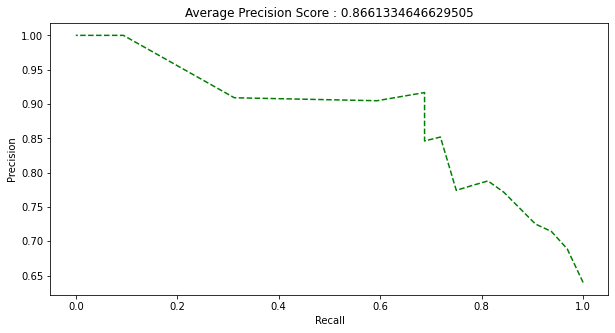

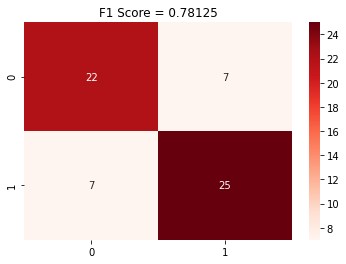

In [206]:
print("Accuracy is : ",score_k)
plotting(Ytest,k.predict_proba(Xtest))
fig=plt.figure()
sns.heatmap(confusion_matrix(Ytest,k.predict(Xtest)), annot= True, cmap='Reds')
k_f1=f1_score(Ytest,k.predict(Xtest))
plt.title('F1 Score = {}'.format(k_f1))

Accuracy of KNN -> 85%

Accuracy of Linear Regression -> 71%

Accuracy of Neural Networks -> 82-88%